# Jordan Colledge 36628576

## Research question/interests

Briefly describe your research question or interests here.

---

Was the "home team advantage" reflected during the 2021-22 NHL season? (i.e. Was the home team more likely to win than the away team?)

Did teams score more goals when they were at home compared to when they were away?

Did a visiting team's distance from their home arena have any effect on their likelihood to win?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
df = pd.read_csv("../data/raw/nhl_elo_2022.csv")
df

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,0.230501,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65
1,2022,2021-10-12,0,0,post,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,...,0.223453,1.408418,0.815100,4,3,1561.989596,1488.285485,72,37,54
2,2022,2021-10-13,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,0.230758,1.308496,0.922343,2,1,1532.563546,1501.851125,63,67,65
3,2022,2021-10-13,0,0,post,NaN,Washington Capitals,New York Rangers,WSH,NYR,...,0.231828,1.293629,0.938377,5,1,1535.936730,1507.136428,68,80,74
4,2022,2021-10-13,0,0,post,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,...,0.221429,1.435292,0.786233,4,2,1567.566728,1480.104248,70,30,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2022,2022-06-18,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,0.227190,1.357772,0.869417,7,0,1633.950631,1596.618631,100,100,100
1397,2022,2022-06-20,1,0,post,NaN,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,0.241300,1.160700,1.080600,6,2,1601.539044,1629.030218,100,100,100
1398,2022,2022-06-22,1,0,post,OT,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,0.239157,1.190721,1.048435,2,3,1598.893234,1631.676028,100,100,100
1399,2022,2022-06-24,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,0.226313,1.369747,0.856566,2,3,1628.397582,1602.171680,100,100,100


# Milestone 3 Task 1
## Exploratory Data Analysis

<AxesSubplot:>

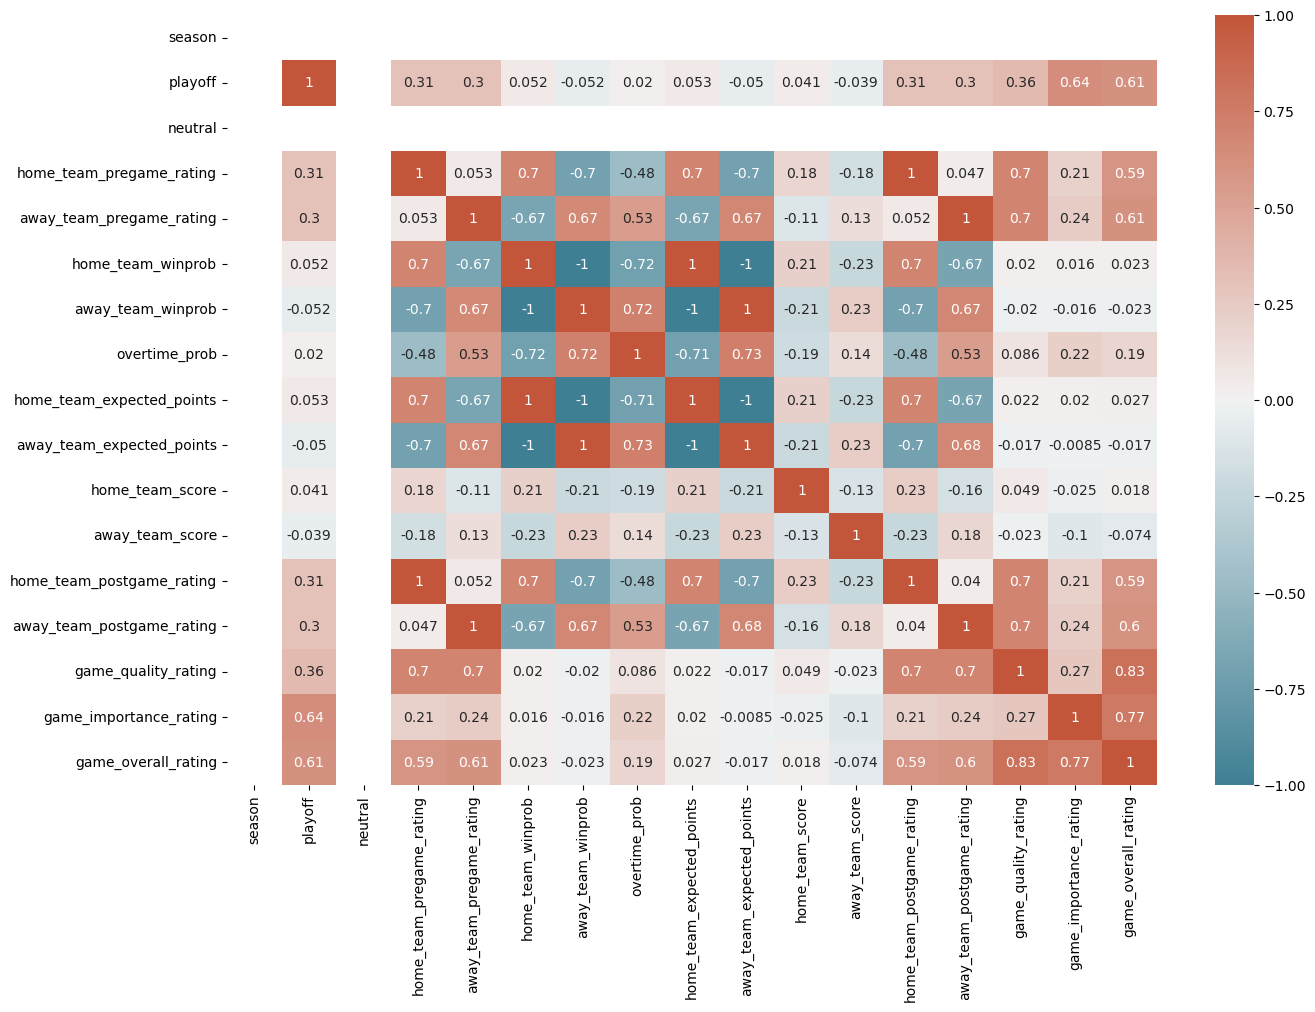

In [4]:
# Displaying all correlations
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## The above heatmap shows correlations between the different columns.
The most notable correlations here are the ones created as an artifact of how FiveThirtyEight created their columns. Clearly, the data needs to be cleaned up.
Notably, the data includes playoff games, which I will not be working with to remove a possible variable.
Since I will not be working with the team and game ratings, I can remove those columns.
However, I'll work on that later, in the analysis pipeline.

Unfortunately, since I'm working with data that isn't included in the table itself (in the distance data), I'll need to import that data here and add it to the table now to explore any more trends. These steps will be recreated in the analysis pipeline later.

In [5]:
# importing distance data

df_distances = pd.read_csv("../data/raw/nhl_distances.csv")
df_distances

,Unnamed: 0,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,Columbus Blue Jackets,...,Pittsburgh Penguins,San Jose Sharks,Seattle Kraken,St Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
0,Anaheim Ducks,NaN,612.86,4233.66,3594.23,1955.31,3647.26,2852.43,1398.51,3239.99,...,3496.33,477.91,1563.35,2616.32,3518.22,3558.82,1755.15,582.02,3757.68,2519.75
1,Arizona Coyotes,612.86,NaN,3704.53,3072.68,1951.97,3062.76,2331.11,946.27,2689.49,...,2949.50,969.59,1780.08,2055.98,2905.37,3046.59,1966.14,572.19,3196.82,2200.88
2,Boston Bruins,4233.66,3704.53,NaN,641.64,3363.94,983.85,1381.23,2842.04,1033.70,...,774.34,4311.10,4000.79,1667.04,1905.03,690.73,4023.05,3732.53,633.43,2163.07
3,Buffalo Sabres,3594.23,3072.68,641.64,NaN,2788.75,786.45,742.89,2200.91,472.07,...,286.16,3670.10,3398.68,1063.39,1691.27,94.64,3433.89,3090.89,468.87,1597.79
4,Calgary Flames,1955.31,1951.97,3363.94,2788.75,NaN,3272.73,2235.78,1437.85,2687.10,...,2861.39,1645.16,710.82,2315.42,3683.25,2710.22,673.71,1441.02,3167.49,1200.88
5,Carolina Hurricanes,3647.26,3062.76,983.85,786.45,3272.73,NaN,1037.24,2342.70,596.44,...,527.28,3826.12,3794.61,1063.14,942.12,873.57,3865.86,3228.79,375.51,2158.71
6,Chicago Blackhawks,2852.43,2331.11,1381.23,742.89,2235.78,1037.24,NaN,1462.81,457.09,...,674.93,2942.92,2775.82,414.26,1624.48,716.38,2837.55,2357.47,972.34,1144.51
7,Colorado Avalanche,1398.51,946.27,2842.04,2200.91,1437.85,2342.70,1462.81,NaN,1873.33,...,2122.40,1491.28,1641.17,1280.58,2451.28,2162.35,1776.45,898.13,2399.40,1285.59
8,Columbus Blue Jackets,3239.99,2689.49,1033.70,472.07,2687.10,596.44,457.09,1873.33,NaN,...,261.48,3363.57,3232.86,636.79,1338.26,507.10,3294.14,2771.42,527.51,1562.27
9,Dallas Stars,2050.02,1439.29,2493.25,1926.74,2467.03,1692.44,1284.02,1066.12,1468.50,...,1721.23,2331.47,2703.64,881.00,1477.63,1936.12,2842.37,1761.93,1903.73,1901.88


In [6]:
# clean up distances: shorten team names to abbreviations
team_abbr = ["ANA", "ARI", "BOS", "BUF", "CGY", "CAR", "CHI", "COL",
                        "CBJ", "DAL", "DET", "EDM", "FLA", "LAK", "MIN", "MTL",
                        "NSH", "NJD", "NYI", "NYR", "OTT", "PHI", "PIT", "SJS",
                        "SEA", "STL", "TBL", "TOR", "VAN", "VEG", "WSH", "WPG"]
df_distances.columns = ["Home",
                        "ANA", "ARI", "BOS", "BUF", "CGY", "CAR", "CHI", "COL",
                        "CBJ", "DAL", "DET", "EDM", "FLA", "LAK", "MIN", "MTL",
                        "NSH", "NJD", "NYI", "NYR", "OTT", "PHI", "PIT", "SJS",
                        "SEA", "STL", "TBL", "TOR", "VAN", "VEG", "WSH", "WPG"]
df_distances['Home'] = team_abbr
df_distances

,Home,ANA,ARI,BOS,BUF,CGY,CAR,CHI,COL,CBJ,...,PIT,SJS,SEA,STL,TBL,TOR,VAN,VEG,WSH,WPG
0,ANA,NaN,612.86,4233.66,3594.23,1955.31,3647.26,2852.43,1398.51,3239.99,...,3496.33,477.91,1563.35,2616.32,3518.22,3558.82,1755.15,582.02,3757.68,2519.75
1,ARI,612.86,NaN,3704.53,3072.68,1951.97,3062.76,2331.11,946.27,2689.49,...,2949.50,969.59,1780.08,2055.98,2905.37,3046.59,1966.14,572.19,3196.82,2200.88
2,BOS,4233.66,3704.53,NaN,641.64,3363.94,983.85,1381.23,2842.04,1033.70,...,774.34,4311.10,4000.79,1667.04,1905.03,690.73,4023.05,3732.53,633.43,2163.07
3,BUF,3594.23,3072.68,641.64,NaN,2788.75,786.45,742.89,2200.91,472.07,...,286.16,3670.10,3398.68,1063.39,1691.27,94.64,3433.89,3090.89,468.87,1597.79
4,CGY,1955.31,1951.97,3363.94,2788.75,NaN,3272.73,2235.78,1437.85,2687.10,...,2861.39,1645.16,710.82,2315.42,3683.25,2710.22,673.71,1441.02,3167.49,1200.88
5,CAR,3647.26,3062.76,983.85,786.45,3272.73,NaN,1037.24,2342.70,596.44,...,527.28,3826.12,3794.61,1063.14,942.12,873.57,3865.86,3228.79,375.51,2158.71
6,CHI,2852.43,2331.11,1381.23,742.89,2235.78,1037.24,NaN,1462.81,457.09,...,674.93,2942.92,2775.82,414.26,1624.48,716.38,2837.55,2357.47,972.34,1144.51
7,COL,1398.51,946.27,2842.04,2200.91,1437.85,2342.70,1462.81,NaN,1873.33,...,2122.40,1491.28,1641.17,1280.58,2451.28,2162.35,1776.45,898.13,2399.40,1285.59
8,CBJ,3239.99,2689.49,1033.70,472.07,2687.10,596.44,457.09,1873.33,NaN,...,261.48,3363.57,3232.86,636.79,1338.26,507.10,3294.14,2771.42,527.51,1562.27
9,DAL,2050.02,1439.29,2493.25,1926.74,2467.03,1692.44,1284.02,1066.12,1468.50,...,1721.23,2331.47,2703.64,881.00,1477.63,1936.12,2842.37,1761.93,1903.73,1901.88


In [7]:
# add distances to df
home = list(df['home_team_abbr'])
away = list(df['away_team_abbr'])
dists = []
for i in range(len(home)):
    # this is ugly.
    # basically, it's my terrible way of getting the distance between the two cities.
    # if this were in Excel, I'd use a VLOOKUP, but we don't have that here.
    # so this will have to do, unoptimized though it is.
    dist = list(df_distances.loc[df_distances["Home"]==home[i]][away[i]])[0]
    dists.append(dist)
    
df.insert(len(df.columns),"distance",tuple(dists),True)
df

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating,distance
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65,1407.74
1,2022,2021-10-12,0,0,post,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,...,1.408418,0.815100,4,3,1561.989596,1488.285485,72,37,54,1208.06
2,2022,2021-10-13,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,1.308496,0.922343,2,1,1532.563546,1501.851125,63,67,65,781.41
3,2022,2021-10-13,0,0,post,NaN,Washington Capitals,New York Rangers,WSH,NYR,...,1.293629,0.938377,5,1,1535.936730,1507.136428,68,80,74,330.53
4,2022,2021-10-13,0,0,post,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,...,1.435292,0.786233,4,2,1567.566728,1480.104248,70,30,50,1462.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2022,2022-06-18,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,1.357772,0.869417,7,0,1633.950631,1596.618631,100,100,100,2451.28
1397,2022,2022-06-20,1,0,post,NaN,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,1.160700,1.080600,6,2,1601.539044,1629.030218,100,100,100,2451.28
1398,2022,2022-06-22,1,0,post,OT,Tampa Bay Lightning,Colorado Avalanche,TBL,COL,...,1.190721,1.048435,2,3,1598.893234,1631.676028,100,100,100,2451.28
1399,2022,2022-06-24,1,0,post,NaN,Colorado Avalanche,Tampa Bay Lightning,COL,TBL,...,1.369747,0.856566,2,3,1628.397582,1602.171680,100,100,100,2451.28


<AxesSubplot:>

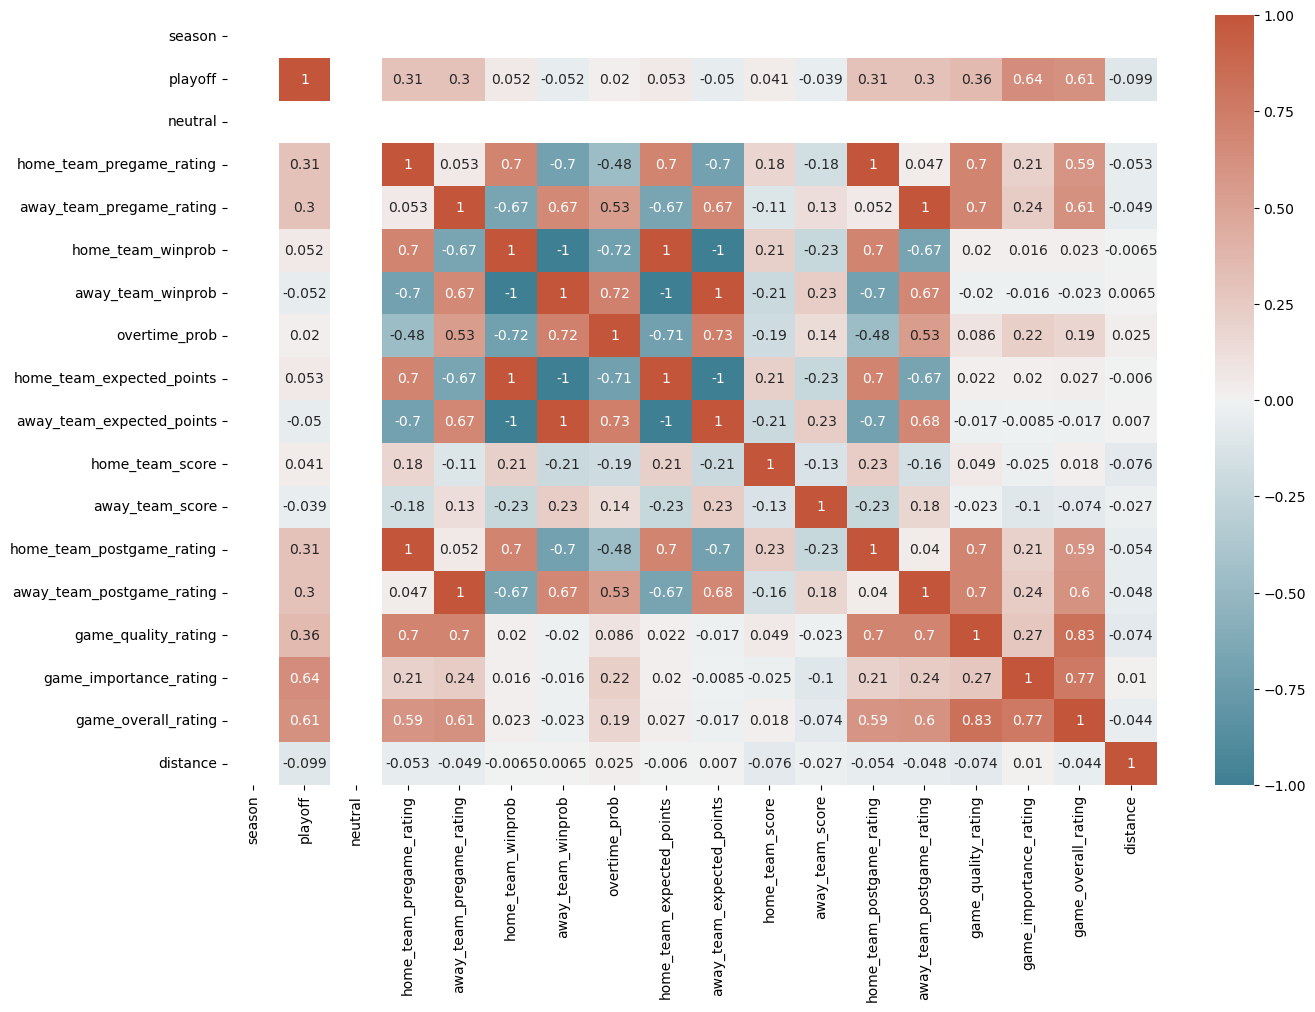

In [8]:
# Displaying all correlations
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# The above heatmap now contains the correlations for distance.

All of the correlations are very small; the largest among them (aside from distance with itself) is with the "playoff" variable, with a correlation of approximately -0.1. Unfortunately, that correlation won't matter as I'll be filtering out playoff games.

<AxesSubplot:title={'center':'Away Team Score by Distance From Home'}, xlabel='distance', ylabel='away_team_score'>

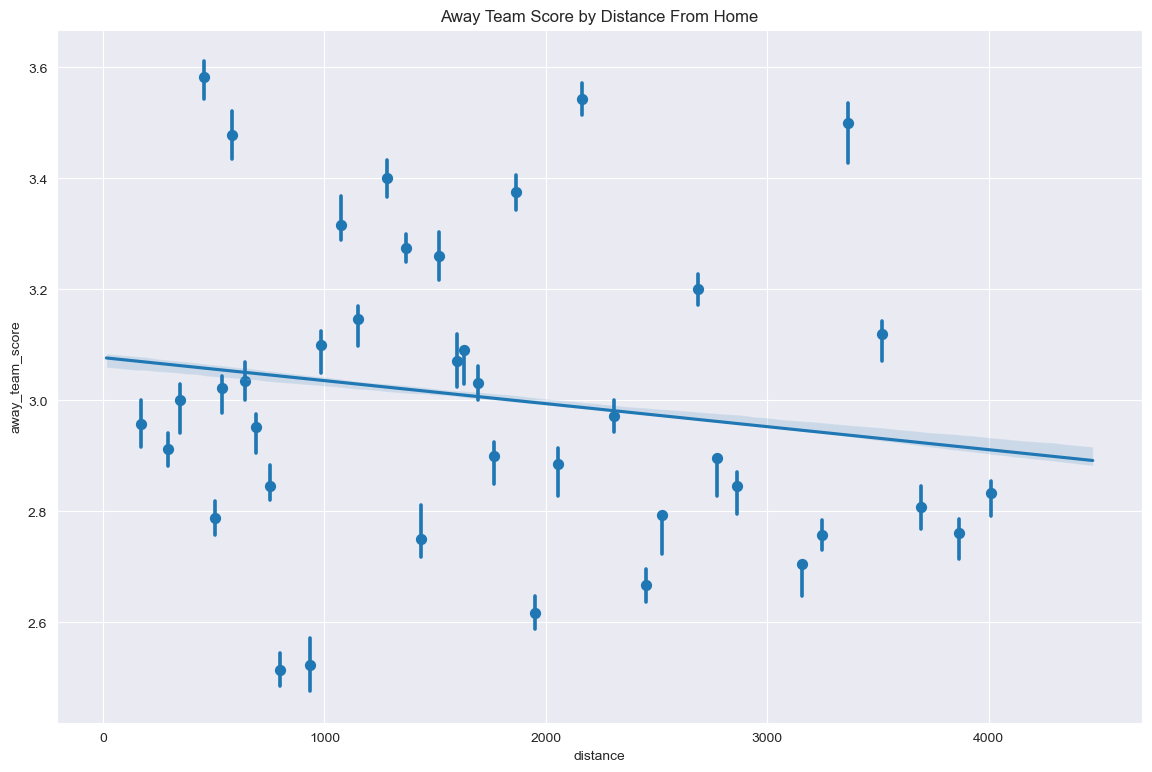

In [9]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
regression_plot = sns.regplot(x='distance',y='away_team_score',data=df, x_bins=40, ci=10)
regression_plot.set(title="Away Team Score by Distance From Home")
regression_plot

# The above regression plot shows the relationship between distance from home and score.

The confidence intervals are to within a 10% range. We can see that there is a noticeable trend for teams further from home to score lower.

However, the y scale of this graph isn't that helpful, and makes the trend seem more significant than it is. Adjusting it to begin at 0, we have the following graph:

<AxesSubplot:title={'center':'Away Team Score by Distance From Home'}, xlabel='distance', ylabel='away_team_score'>

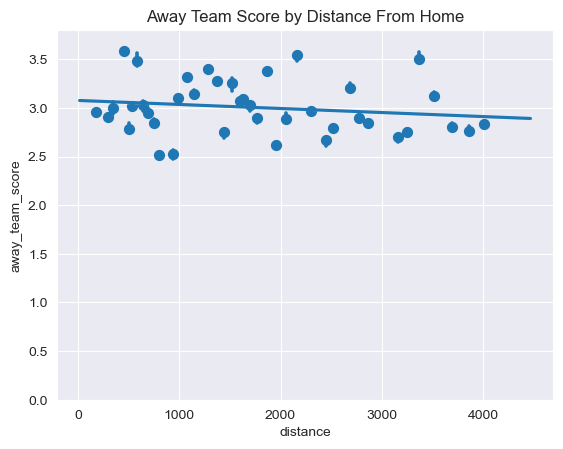

In [10]:
rp_from_zero = sns.regplot(x='distance',y='away_team_score',data=df, x_bins=40, ci=10)
rp_from_zero.set(ylim=[0,3.8],title="Away Team Score by Distance From Home")
rp_from_zero

At this scale, it's obvious that the correlation is very small, to the point of being mostly negligible.

The following graph will show a similar correlation, this time between distance and the home team's score.

<AxesSubplot:title={'center':"Home Team Score by Opponents' Distance From Home"}, xlabel='distance', ylabel='home_team_score'>

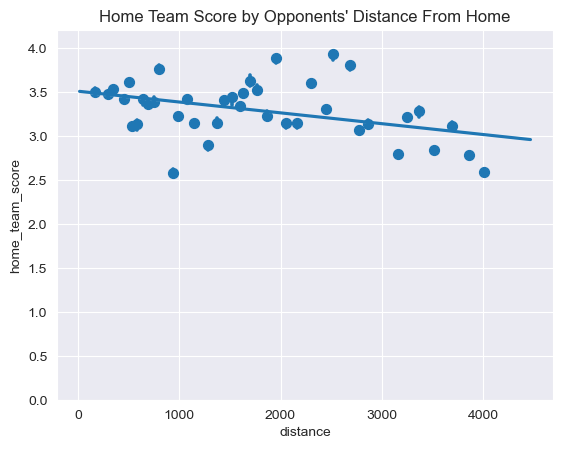

In [11]:
rp_home = sns.regplot(x='distance',y='home_team_score',data=df, x_bins=40, ci=10)
rp_home.set(ylim=[0,4.2], title="Home Team Score by Opponents' Distance From Home")
rp_home

## Well, that's a surprising trend...

The above graphs show perhaps a much more surprising (to me) trend -- that the home team tends to score *fewer* goals against teams that are far from home! I'll explore this more in the full analysis.

# Milestone 3 Task 2
## Analysis Pipeline: Clean, process and wrangle data

In [11]:
# Cleaning up by removing extra columns.

#df = df[df.playoff==0]

# Season is unnecessary as it's all the 2021/22 season.
# After removing playoff games above, playoff is then unnecessary as well.
#df = df.drop(columns=["season", "playoff"])

# I drop columns involving ratings and expected score, as I'm working with the results of games,
# not FiveThirtyEight's ratings.
#df = df.drop(columns=df.columns[8:15])
#df = df.drop(columns=["home_team_postgame_rating","away_team_postgame_rating","game_quality_rating","game_importance_rating","game_overall_rating"])

# Neutral is all zeroes, so I drop that column as well.
#df = df.drop(columns="neutral")

# Status is all 'post' meaning the game has passed, so I drop that.
#df = df.drop(columns="status")

In [12]:
# add score differentials to df
# turns out this can be done better! and it has been done better in the .py file.
#home = list(df['home_team_score'])
#away = list(df['away_team_score'])
#home_diffs = []
#away_diffs = []
#for i in range(len(home)):
#    home_diff = home[i] - away[i]
#    home_diffs.append(home_diff)
#    away_diffs.append(-home_diff)
    
#df.insert(len(df.columns),"home_team_diff",tuple(home_diffs),True)
#df.insert(len(df.columns),"away_team_diff",tuple(away_diffs),True)
#df

# Milestone 3 Task 3
Method Chaining and Writing Programs

See `project_functions_JC.py` for the method I wrote.

In [12]:
import project_functions_JC

df_processed = project_functions_JC.load_and_process("../data/raw/nhl_elo_2022.csv")
df_processed

       ot             home_team            away_team home_team_abbr  \
0     NaN   Tampa Bay Lightning  Pittsburgh Penguins            TBL   
1     NaN  Vegas Golden Knights       Seattle Kraken            VEG   
2     NaN   Toronto Maple Leafs   Montreal Canadiens            TOR   
3     NaN   Washington Capitals     New York Rangers            WSH   
4     NaN    Colorado Avalanche   Chicago Blackhawks            COL   
...   ...                   ...                  ...            ...   
1307  NaN          Dallas Stars        Anaheim Ducks            DAL   
1308   SO       Edmonton Oilers    Vancouver Canucks            EDM   
1309  NaN        Seattle Kraken      San Jose Sharks            SEA   
1310  NaN       Arizona Coyotes  Nashville Predators            ARI   
1311  NaN         Winnipeg Jets       Seattle Kraken            WPG   

     away_team_abbr  home_team_score  away_team_score  
0               PIT                2                6  
1               SEA                

,ot,home_team,away_team,home_team_abbr,away_team_abbr,home_team_score,away_team_score,home_team_diff,away_team_diff,distance
0,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,2,6,-4,4,1407.74
1,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,4,3,1,-1,1208.06
2,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,2,1,1,-1,781.41
3,NaN,Washington Capitals,New York Rangers,WSH,NYR,5,1,4,-4,330.53
4,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,4,2,2,-2,1462.81
...,...,...,...,...,...,...,...,...,...,...
1307,NaN,Dallas Stars,Anaheim Ducks,DAL,ANA,4,2,2,-2,2050.02
1308,SO,Edmonton Oilers,Vancouver Canucks,EDM,VAN,3,2,1,-1,764.76
1309,NaN,Seattle Kraken,San Jose Sharks,SEA,SJS,3,0,3,-3,1144.71
1310,NaN,Arizona Coyotes,Nashville Predators,ARI,NSH,5,4,1,-1,2333.98


# Milestone 3 Task 4
## Data Analysis: Answer research questions

<AxesSubplot:title={'center':'Away Team Score by Distance From Home'}, xlabel='distance (km)', ylabel="Away Team's Score">

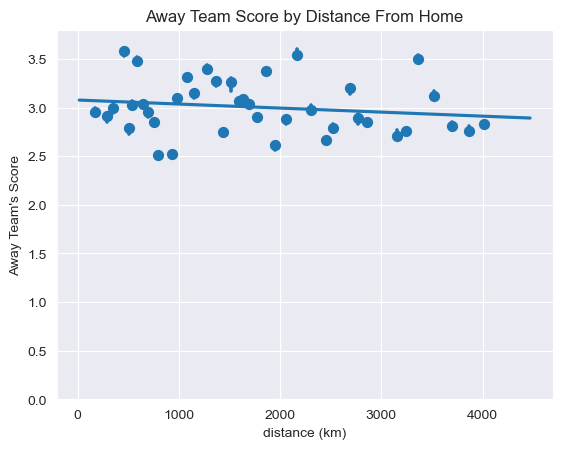

In [15]:
rp_from_zero = sns.regplot(x='distance',y='away_team_score',data=df, x_bins=40, ci=10)
rp_from_zero.set(ylim=[0,3.8],title="Away Team Score by Distance From Home",xlabel="distance (km)",ylabel="Away Team's Score")
plt.savefig("away-score-by-dist.png")
rp_from_zero

# As seen above, the graph shown displays the average score of a visiting team, based on their distance from home.

This graph is the same as the one shown in the EDA, albeit with the axis labels changed. This reuse is for good reason! It does a great job of showing the correlation as described; there's no need to over-complicated a graph like this, at least for a simple display. The graph shows exactly what's needed, which is that there's a negative correlation; away teams tend to score less after traveling further. The difference seems to be in the neighbourhood of about 0.2 goals per game -- meaning an away team will score about **one fewer goal per five games** when playing a team extremely far from them, compared to one extremely close.

<AxesSubplot:title={'center':"Home Team Score by Opponents' Distance From Home"}, xlabel='distance (km)', ylabel="Home Team's Score">

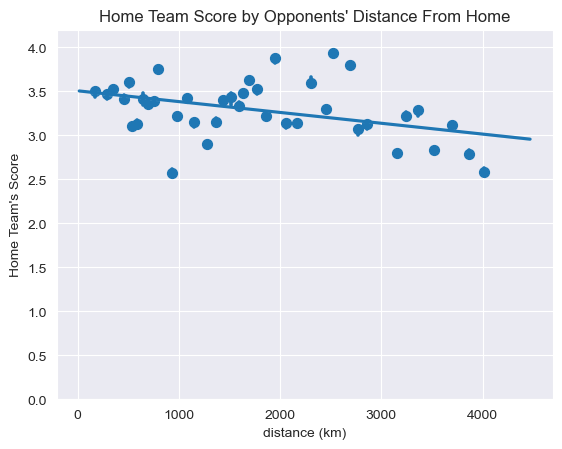

In [16]:
rp_home = sns.regplot(x='distance',y='home_team_score',data=df, x_bins=40, ci=10)
rp_home.set(ylim=[0,4.2], title="Home Team Score by Opponents' Distance From Home",xlabel="distance (km)",ylabel="Home Team's Score")
plt.savefig("home-score-by-dist.png")
rp_home

# As seen above, the graph shown displays the average score of a home team, based on their *opponents'* distance from home.

As above, this is exactly the same graph as given in the EDA, and I have the same logic for re-using this one. No point in reinventing the wheel, or over-complicating things, when this graph works perfectly well.

<AxesSubplot:title={'center':"Away Team's Score Differential by Distance from Home"}, xlabel='distance (km)', ylabel='Goal Difference'>

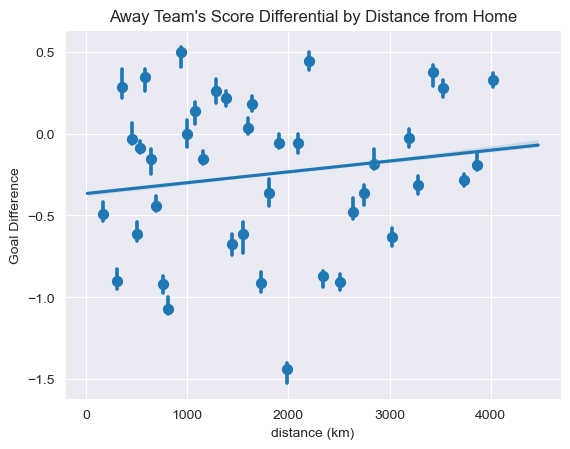

In [17]:
rp_awaydiff = sns.regplot(x='distance',y='away_team_diff',data=df_processed, x_bins=40, ci=10)
rp_awaydiff.set(title="Away Team's Score Differential by Distance from Home",xlabel="distance (km)",ylabel="Goal Difference")
plt.savefig("away-diff-by-dist.png")
rp_awaydiff

## The above plot shows the relationship between the distance traveled by an away team, and their goal differential.

The goal differential for a team is defined as the difference between their score and their opponents' score.
So, with this plot, we can determine that away teams' scores tended to increase relative to their opponents, when they were playing further away from their home arena.
This means that there's a **tangible (if small) increase** in teams' winrates with travel distance!
According to the graph, teams playing very near home -- like the New Jersey Devils playing the New York Rangers -- would actually play *worse* relative to their opponents than a team playing extremely far from home. Relative to their opponents, they would expect to score an average of about 0.3 goals per game *less* by playing close to home.

In all honesty, this is not what I expected -- I expected a decrease in teams' winrates with travel distance. This correlation could be related to the strengths of a few of the outlying teams that year; the Panthers, Lightning, Oilers, Flames and Avalanche are all in the longer half in terms of average distance from other teams in the league, and those teams all performed very strongly throughout the season. More analysis would be needed to separate this trend from a team's average winrate, though. 

I'll now show a similar graph for the home team differential. It's very simple -- just the negative of the away team differential -- but it's still worth seeing all the same.

<AxesSubplot:title={'center':"Home Team Score Differential by Opponents' Distance From Home"}, xlabel='distance (km)', ylabel='Goal Difference'>

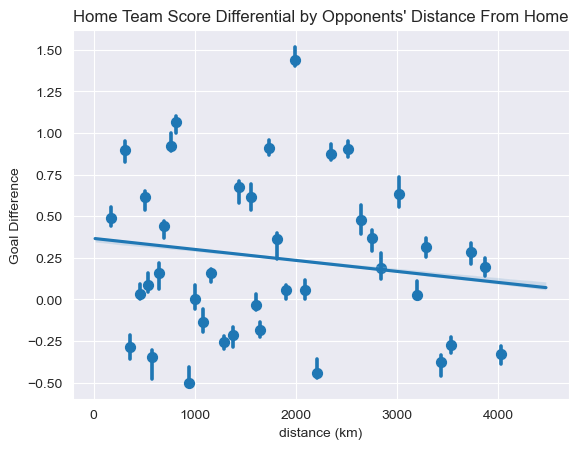

In [18]:
rp_homediff = sns.regplot(x='distance',y='home_team_diff',data=df_processed, x_bins=40, ci=10)
rp_homediff.set(title="Home Team Score Differential by Opponents' Distance From Home", xlabel="distance (km)", ylabel="Goal Difference")
plt.savefig("home-diff-by-dist.png")
rp_homediff

## What about the home team advantage?

The above plots prove the home team advantage well enough - in the home team differential, at every point, the regression line is above 0, indicating that the home team tends to outscore the away team. Similarly, in the away team's differential, the regression line stays below 0, indicating that the away team *gets* outscored by the home team.

That said, neither graph is that stellar at displaying the data - it's a bit bloated. So I'll use a different graph to display that fact.

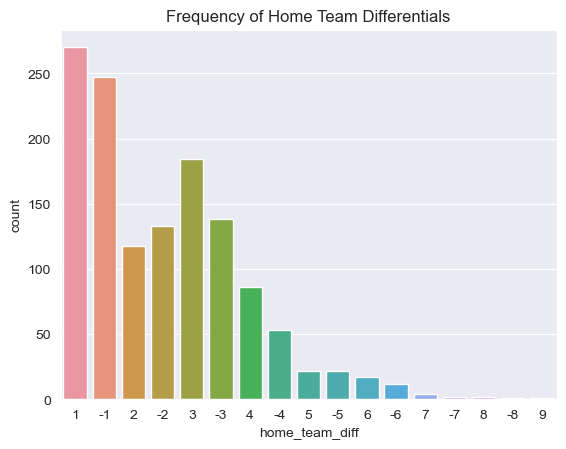

In [19]:
home_diff_count = sns.countplot(data=df_processed, x="home_team_diff",order=[1,-1,2,-2,3,-3,4,-4,5,-5,6,-6,7,-7,8,-8,9])
home_diff_count.set(title="Frequency of Home Team Differentials")
plt.savefig("home-diff-histogram.png")

## The above graph shows how frequently home teams reached each given differential.

The graph -- very loosely -- appears to follow a normal distribution with a raised center. With overtime and shootout games always resulting in a differential of 1 or -1, it makes sense that these would be the most common distributions.

It becomes obvious looking at this graph that home team advantage *did* exist during the 2021-22 NHL season. While home teams were more likely to lose by 2 than they were to win by 2, this was by a negligible amount -- around 10 or 15 games, for a total of around 20 to 30 goals below their opponents. However, this amount is blown out of the water by the difference in three-goal games: home teams won **50** more games by 3 than the number of games they lost by 3, a total of around 150 excess goals. A similar story repeats for every goal differential other than 2; home teams win more games by 1, 4, 5, 6, and 7 than they lose by the same amount.

This is absolutely undeniable evidence that teams playing at home *did* tend to win more often than their visiting opponents, at least in the regular season.

Logically, then, it should hold that teams simply score more when playing at home, right?

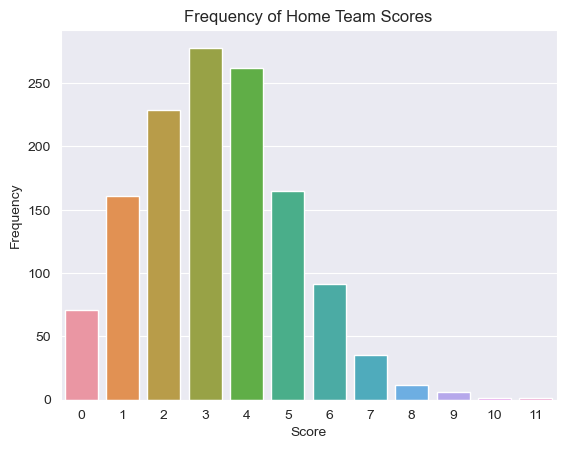

In [20]:
home_score_count = sns.countplot(data=df_processed, x="home_team_score")
home_score_count.set(title="Frequency of Home Team Scores",xlabel="Score",ylabel="Frequency")
plt.savefig("home-score-histogram.png")

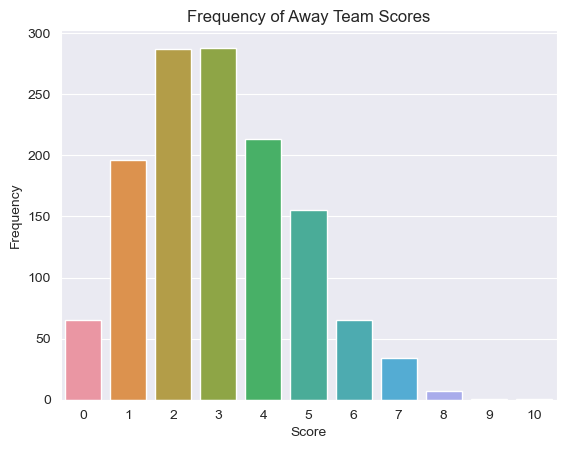

In [21]:
away_score_count = sns.countplot(data=df_processed, x="away_team_score")
away_score_count.set(title="Frequency of Away Team Scores",xlabel="Score",ylabel="Frequency")
plt.savefig("away-score-histogram.png")

# The above graphs show the frequency of various scores for home and away teams.

The difference here is clear -- away teams peak at a score of 2, where home teams peak at a score of 3. Home teams also tend to **score three or more goals more often** than the away teams, who tend to score 1 or 2 points a game.

Interestingly, the rate of shutouts appears more or less the same between the two, at approximately 70 home team and away team shutouts each.

We can also create a heatmap of each possible game result, which will help reinforce the home team advantage:

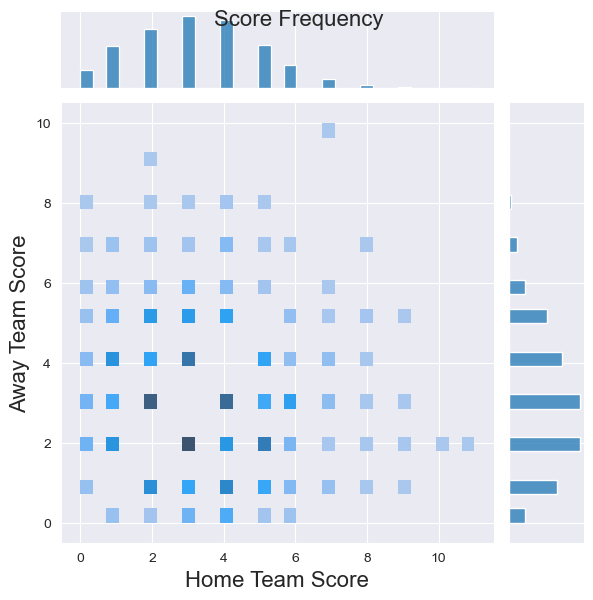

In [27]:
score_heatmap = sns.jointplot(data=df_processed, x="home_team_score",y="away_team_score",kind="hist")
score_heatmap.set_axis_labels('Home Team Score', 'Away Team Score', fontsize=16)
plt.suptitle("Score Frequency", fontsize=16)
plt.savefig("score-frequency-heatmap.png")
score_heatmap

# The above heatmap shows the frequency of different score combinations, as well as histograms of the frequencies of home and away scores.

As on Quiz 4, it seems difficult to move the title of the graph -- I've left it overlapping, as much as I'd like to have it on its own.

In [47]:
df_scores = df_processed['home_team_score'].to_frame().assign(away_team_score=df_processed['away_team_score'])
print(df_scores.describe())

#print("Statistics on home teams' scores:")
#print(df_processed['home_team_score'].describe())

#print("Statistics on away teams' scores:")
#print(df_processed['away_team_score'].describe())

       home_team_score  away_team_score
count      1401.000000      1401.000000
mean          3.287652         3.003569
std           1.825039         1.728538
min           0.000000         0.000000
25%           2.000000         2.000000
50%           3.000000         3.000000
75%           4.000000         4.000000
max          11.000000        10.000000


### The above data shows the clear difference between the two scores.

The count of 1401 simply refers to the 1401 games played, each with one home and one away team.
By this data, it's clear that home teams tend to score about **0.28 goals per game more** than away teams; or, about **two goals in every seven games**.